### Problem Statement
XYZ Company's 2021-2025 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets, USe these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.

### Objectives
- Identify top performing products channels and regions driving revenue and profit.
-

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [64]:
# dataframes

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2024 Budgets']

In [65]:
# initial inspection

print('df_sales shape:', df_sales.shape)
print('df_customers shape:', df_customers.shape)
print('df_products shape:', df_products.shape)
print('df_regions shape:', df_regions.shape)
print('df_state_reg shape:', df_state_reg.shape)
print('df_budgets shape:', df_budgets.shape)

df_sales.head(5)

df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [66]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [67]:
df_products.head(5)

,Index,product name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [68]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [69]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [70]:
df_budgets.head(5)

,Product Name,2024 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [71]:
# modify header

new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop = True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [72]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [73]:
df_budgets.isnull().sum()

,0
Product Name,0
2024 Budgets,0


In [74]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [75]:
df_products.isnull().sum()

,0
Index,0
product name,0


In [76]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [77]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


### Data Cleaning and Wrangling

In [78]:
df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)

In [79]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [80]:
df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)

In [81]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,product name
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [82]:
df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)

In [83]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [84]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [85]:
df_state_reg = df_state_reg.rename(columns={'State': 'state_name'})
df = df.merge(
    df_state_reg[["State Code", "state_name", "Region"]],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
)

In [86]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,state_name,Region
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast


In [87]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,state_name,Region
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast


In [88]:
df = df.merge(
    df_budgets,
    how = 'left',
    left_on = 'product name',
    right_on = 'Product Name'
)

In [89]:
df.to_csv('file.csv')

In [90]:
# drop extra columns result from merging

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code', 'Product Name']
df = df.drop(columns = cols_to_drop, errors = 'ignore')

In [91]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,state_name,Region,2024 Budgets
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,Georgia,South,964940.231
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Indiana,Midwest,2067108.120
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,California,West,5685138.270
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Indiana,Midwest,889737.555
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,Connecticut,Northeast,1085037.329


In [92]:
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone',
       'state_name', 'region', '2024 budgets'], dtype=object)

In [93]:
# drop unnecessary columns

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2024 budgets'
    ]
df = df[cols_to_keep]

In [94]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2024 budgets
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [95]:
# rename the columns

df = df.rename(columns = {
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_names',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total_unit_cost': 'cost',
    'state_code': 'state',
    'latitude': 'lat',
    'longitude': 'lon',
    '2024 budgets': 'budget'
})

df.head(1)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state,region,lat,lon,budget
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [96]:
# blank out budgets for non-2024 orders

df.loc[df['order_date'].dt.year != 2024, 'budget'] = pd.NA

df[['order_date', 'product_name', 'revenue','budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2025-02-28,Product 26,21788.4,NaN
64100,2025-02-28,Product 21,5185.8,NaN
64101,2025-02-28,Product 13,43483.0,NaN
64102,2025-02-28,Product 20,27717.9,NaN
64103,2025-02-28,Product 15,7986.4,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_names   64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [98]:
df_2024 = df[df['order_date'].dt.year == 2024]

df.isnull().sum()

,0
order_number,0
order_date,0
customer_names,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
total unit cost,0
state,0


In [99]:
df_2024.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state,region,lat,lon,budget
46363,SO - 0002544,2024-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2024-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2024-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2024-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2024-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


### Feature Engineering

In [100]:
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state,region,lat,lon,budget
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [101]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit'] / df['revenue'] * 100

In [102]:
df.to_csv('final.csv')

In [103]:
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


### EDA


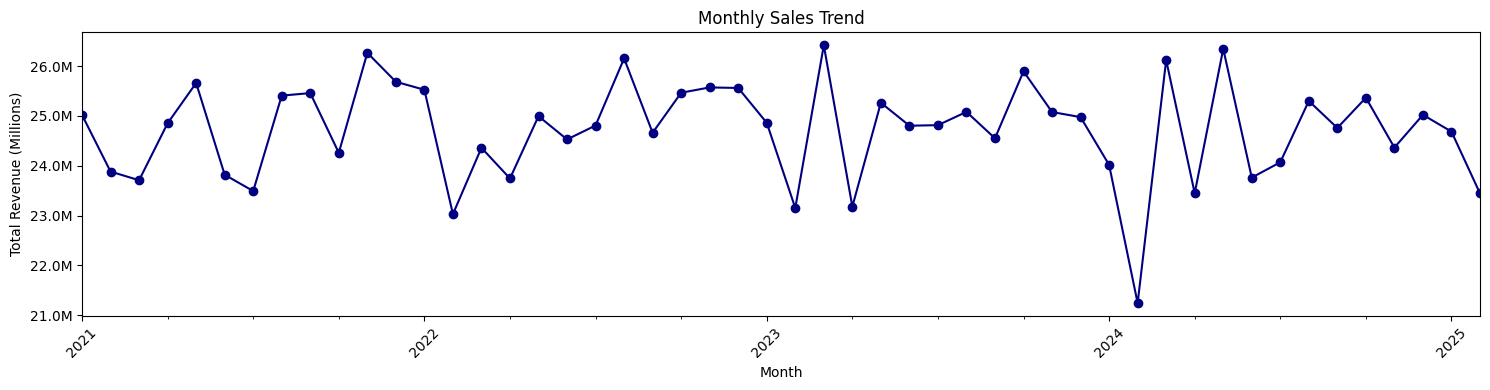

In [104]:
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize =(15, 4))

monthly_sales.plot(marker = 'o', color = 'navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### Insights
Oberserve the yearly pattern, the sales consistently cycle between 24M and 26M, with peaks between March and April, and trough in January and February.

Also notice the sharp drop in sales in early 2024 as an outlier. More detailed investigation is required to see the potential causes such as market disruptions or mistimed promotions.

### Monthly Sales Trend

In [105]:
df['order_date'] = pd.to_datetime(df['order_date'])

df_new = df[~((df['order_date'].dt.year == 2025) & (df['order_date'].dt.month.isin([1, 2])))]

/tmp/ipython-input-106-2506425873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-106-2506425873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


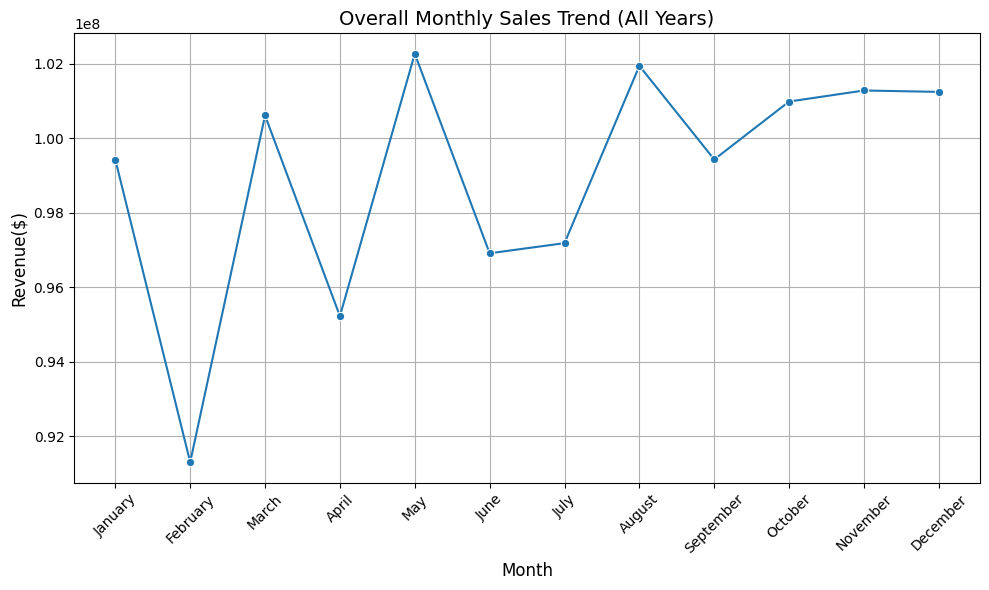

In [106]:
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

df_new['month'] = df_new['order_date'].dt.strftime('%B')

monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories = month_order, ordered = True)
monthly_trend = monthly_trend.sort_values('month')

plt.figure(figsize = (10, 6))
sns.lineplot(data = monthly_trend, x = 'month', y = 'revenue', marker = 'o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Revenue($)', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

plt.show()

### Insights
Corresponding to previous observation on sales throughout years, we see a revenue decline in February, then continue fluctuation until May, then the last two quarters has less fluctuations in sales.

Besides to explore why 2024 has an outlier in spring, we also want to analyze:
- What factors in February and May led to the trough/peak revenue?
- Why first two quarters fluctuats more than the later two?

### Top 10 Products by Revenue

/tmp/ipython-input-107-1900065167.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data = top_10_products, x = 'product_name', y = 'revenue', palette = 'tab10')


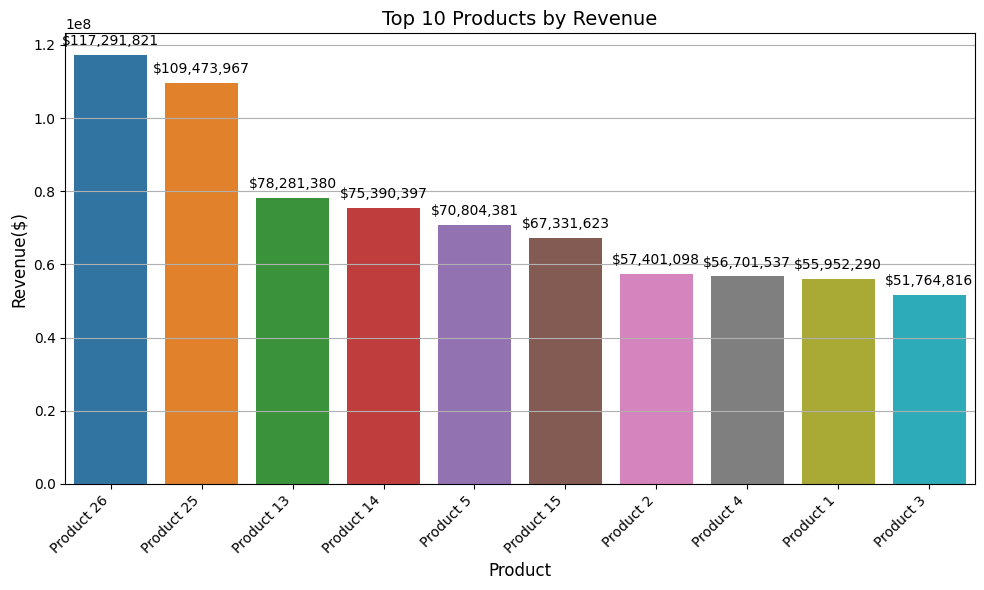

In [107]:
# top 10 products by revenue

product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

top_10_products = product_revenue.sort_values(by = 'revenue', ascending = False).head(10)

plt.figure(figsize = (10, 6))
barplot = sns.barplot(data = top_10_products, x = 'product_name', y = 'revenue', palette = 'tab10')

for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'bottom', fontsize = 10, color = 'black',
        xytext = (0, 5), textcoords = 'offset points')

plt.title('Top 10 Products by Revenue', fontsize = 14)
plt.xlabel('Product', fontsize = 12)
plt.ylabel('Revenue($)', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True, axis = 'y')
plt.tight_layout()

plt.show()

### Bottom 10 Products by Revenue

/tmp/ipython-input-108-4291182801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data = bottom_10_products, x = 'product_name', y = 'revenue', palette = 'tab10')


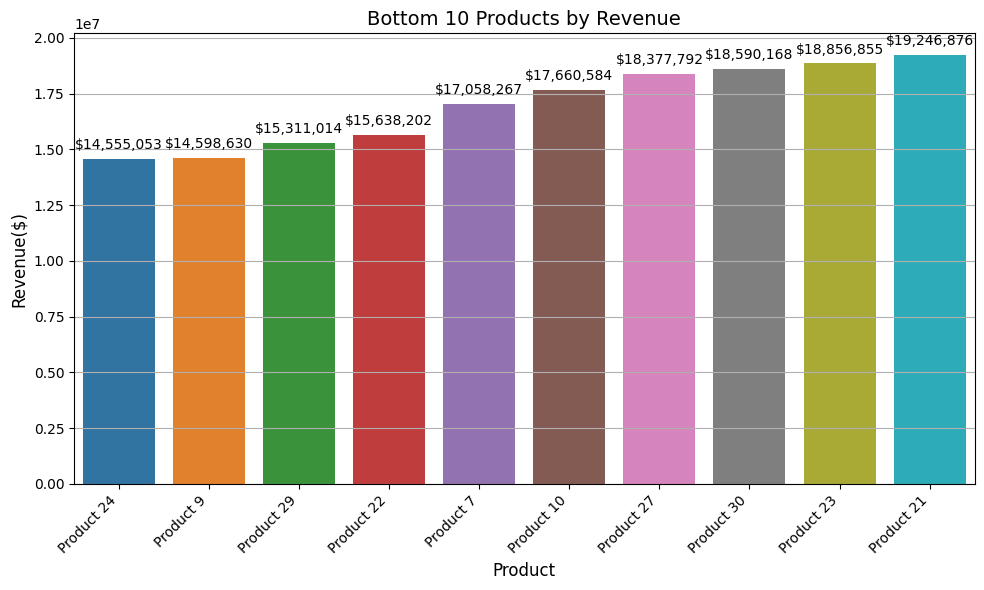

In [108]:
# bottom 10 products
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

bottom_10_products = product_revenue.sort_values(by = 'revenue', ascending = True).head(10)

plt.figure(figsize = (10, 6))
barplot = sns.barplot(data = bottom_10_products, x = 'product_name', y = 'revenue', palette = 'tab10')

for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'bottom', fontsize = 10, color = 'black',
        xytext = (0, 5), textcoords = 'offset points')

plt.title('Bottom 10 Products by Revenue', fontsize = 14)
plt.xlabel('Product', fontsize = 12)
plt.ylabel('Revenue($)', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True, axis = 'y')
plt.tight_layout()

plt.show()

### Sales by Channel

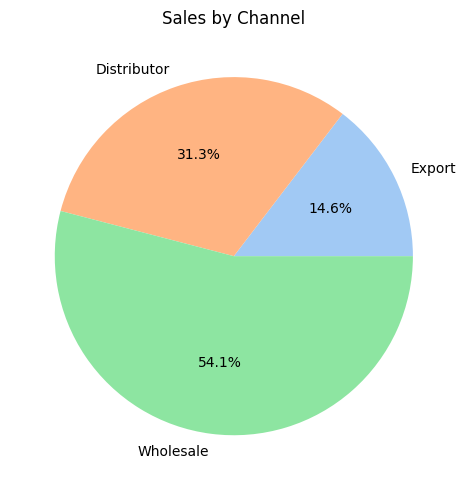

In [109]:
# sales by channel

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending = True)
plt.figure(figsize = (5, 5))

plt.pie(
    chan_sales.values,
    labels = chan_sales.index,
    autopct = '%1.1f%%',
    colors = sns.color_palette('pastel')[0:5]
)
plt.title('Sales by Channel')

plt.tight_layout()
plt.show()

### Insights
54.1% Sales from wholesale underscore reliance on domestic bulk channels. Hence factors that directly impact wholesale would leaf to potential risks. Hence, to answer the previous questions, we can propose hypothesis:
- To mitigate risks and instability in revenues, the company can target overseas markets and strategic partners.
- Markets fluctuates more in spring because there are factors affecting the wholesale channel that make the demand instable.

### Average Order Value (AOV) Distribution

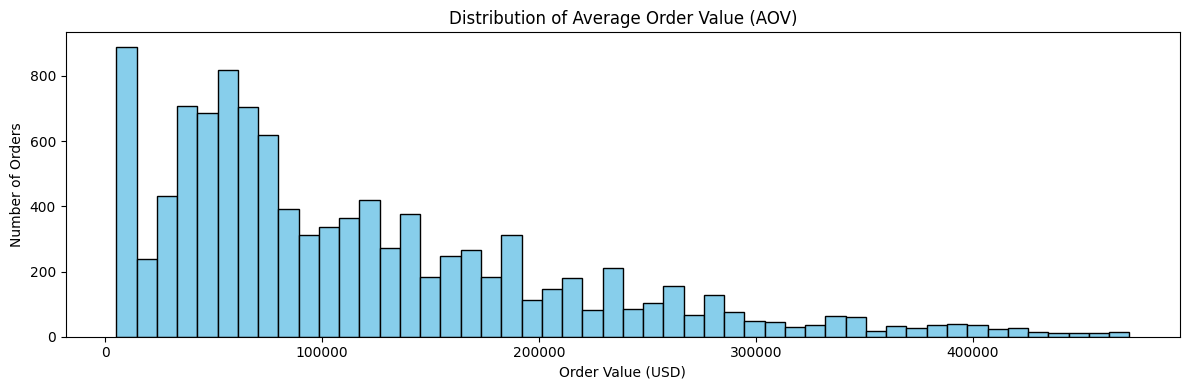

In [110]:
# average order value (AOV) distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize = (12, 4))

plt.hist(
    aov,
    bins = 50,
    color = 'skyblue',
    edgecolor = 'black'
)
plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

### Insights
The order value distribution is heavily right-skewed, with most orders clustered between 20k and 12k.
Even though large orders represent only a small share of total volume, their impact on the sales are not negligible.

In [111]:
# unit price distribution per product
# top 10 states by revenue and order count
# average profit marging by channel
# top and bottom 10 customers by revenue
# customer segmentation: revenue vs Profit Margin
# correlation heatmap

### Profit MArgin% vs. Unit Price

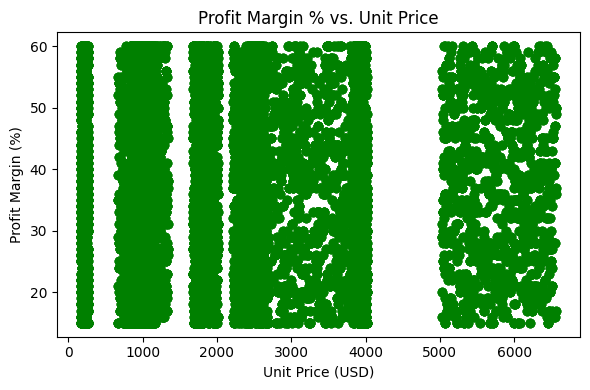

In [112]:
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

plt.figure(figsize=(6,4))
plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='green'
)

plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')

plt.tight_layout()

plt.show()

### Insights
Profit margins are concentrated under 60%, with no strong correlation to price.

### Unite Price Distribution per Product

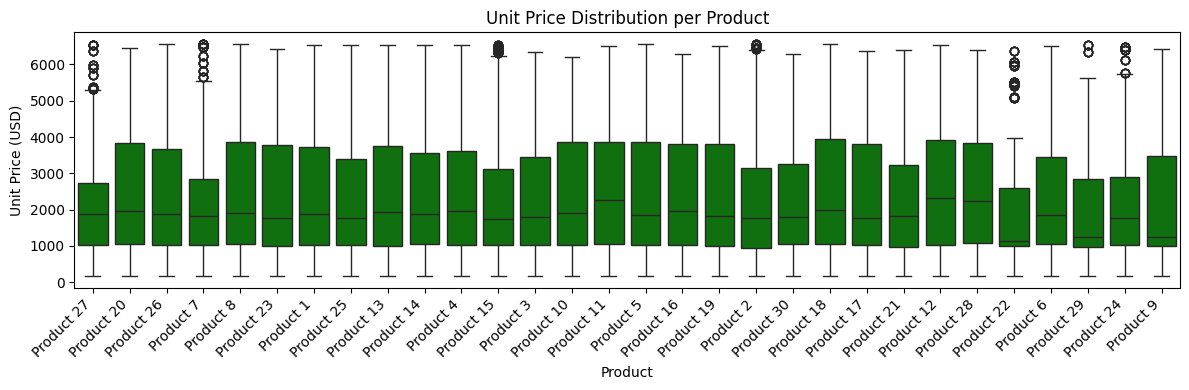

In [113]:
plt.figure(figsize=(12,4))

sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='g'
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


### Insights
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near
100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

### Total Sales by US Region

/tmp/ipython-input-114-1350103137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


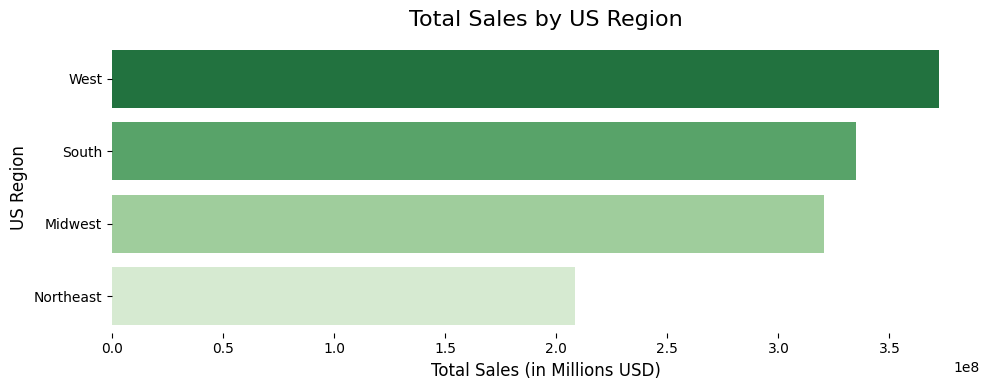

In [114]:
region_sales = (
    df.groupby('region')['revenue'].sum().sort_values(ascending=False)
)

plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)

plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### Insights
- West dominates with roughly 360M in sales(~35% of total), underscoring its market leadership.
- South & Midwest each contribute over 320M(32%), indicating strong, consistent demand across central regions.
Northeast trails at about 210M(20%), signaling room for growth and targeted investment.
- Action: Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer_names     64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   total unit cost    64104 non-null  float64       
 9   state              64104 non-null  object        
 10  county             64104 non-null  object        
 11  state              64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  lon   

### Top 10 States by Revenue and Order Count

/tmp/ipython-input-116-4164341784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-116-4164341784.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


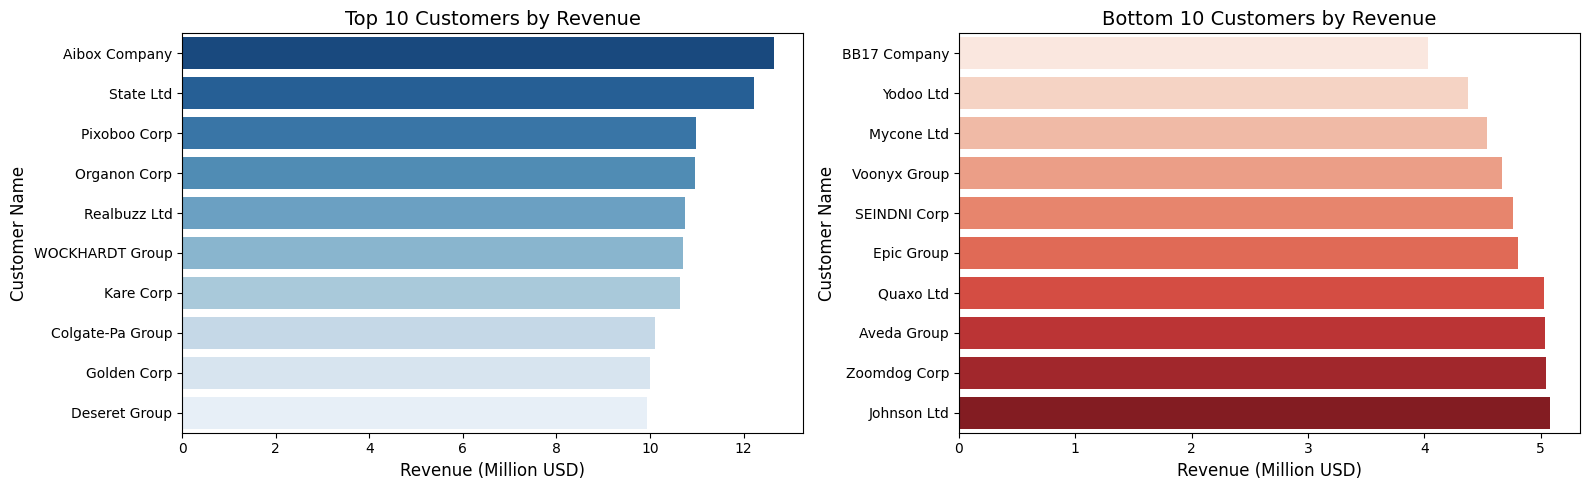

In [116]:
top_rev = (
    df.groupby('customer_names')['revenue'].sum().sort_values(ascending=False).head(10)
)

bottom_rev = (
    df.groupby('customer_names')['revenue'].sum().sort_values(ascending=True).head(10)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(
    x=top_rev.values / 1e6,
    y=top_rev.index,
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)


sns.barplot(
    x=bottom_rev.values / 1e6,
    y=bottom_rev.index,
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)

plt.tight_layout()
plt.show()

### Insights
California leads by a wide margin, generating about $230M in revenue and 7500 orders—more than twice the next-highest state.

Illinois, Florida, and Texas form a solid second tier, each posting $85–110M in revenue with 3600–4600 orders.

New York and Indiana are mid-pack (≈
35–44M with 1600–2100 orders.

The close alignment between revenue and order counts suggests similar average order values across states; to drive growth, focus on increasing order volume in the mid-tier and raising order size in lower-performing regions.

### Customer Segmentation: Revenue vs. Profit Margin


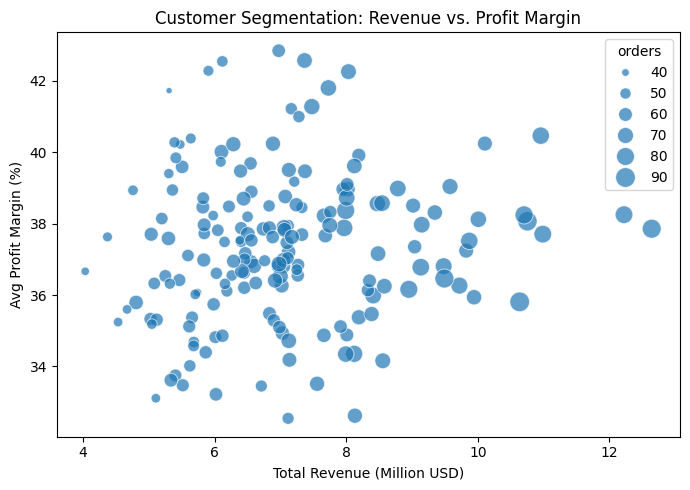

In [117]:
cust_summary = df.groupby('customer_names').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

### Insights
Customers with >10M in revenue tend to sustain margins between 36–40%, indicating that scale does not significantly erode profitability.
Most customers cluster within the 6–10M range and show stable margins(34–40%), suggesting consistent pricing in this tier.
Customers below 6M display the widest margin variance(33–43%), pointing to more volatile cost structures or discounts among smaller accounts.
Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.

### Correlation Heatmap

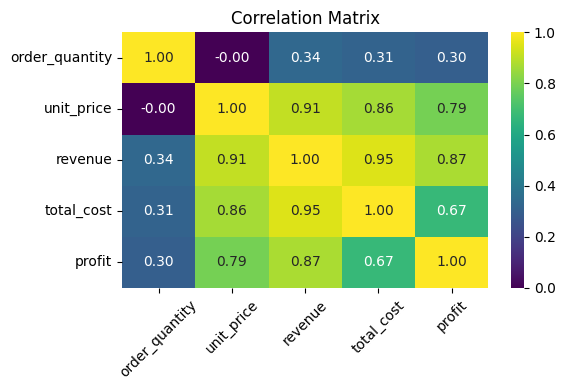

In [118]:
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

corr = df[num_cols].corr()

plt.figure(figsize=(6,4))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)

plt.title('Correlation Matrix')
plt.xticks(rotation=45)


plt.tight_layout()


plt.show()

### Insights
- Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
- Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.
- Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.
- Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.